In [2]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

## 4.
## Формула расчета статистики критерия
## $Z = \sum_{i=1}^{k}\frac{(n_i-np_i)^2}{np_i}$
## Закон распределения статистики критерия при условии истинности основной гипотезы
## $X \sim \chi^2(k - r - 1)$
## Формула расчета критической точки
## $\chi^2_{1 - \frac{\alpha}{2}}(k-r-1)$
## Формула расчета p-value
## $f(x)= \frac{\Gamma\left(\frac{n+1}{2}\right)}{\sqrt{n \pi} \Gamma\left(\frac{n}{2}\right)\left(1+\frac{x^2}{n}\right)^{\frac{n+1}{2}}}$

In [3]:
df = pd.read_excel("table.xls", sheet_name="A - aaup")

In [4]:
from math import log

n = len(df.A8)
X = df.A8.to_numpy()

bins_number = 11
h = (max(X) - min(X)) / bins_number   #ширина
bins_number, h, max(X), min(X)

(11, 57.63636363636363, 866, 232)

In [5]:
m = np.mean(X)
d = np.var(X, ddof = 1)
s = np.std(X, ddof = 1)
m, d, s

(428.0326188257223, 8217.62113651222, 90.6510956167228)

In [6]:
hist, bin_edges = np.histogram(X, bins=bins_number)
bin_edges

array([232.        , 289.63636364, 347.27272727, 404.90909091,
       462.54545455, 520.18181818, 577.81818182, 635.45454545,
       693.09090909, 750.72727273, 808.36363636, 866.        ])

In [14]:
freq,division = np.histogram(X, bins=bins_number)
for i in range(len(freq)):
    print(freq[i], round(freq[i]/len(X), 3))

30 0.028
172 0.16
290 0.27
255 0.238
145 0.135
118 0.11
40 0.037
13 0.012
6 0.006
2 0.002
2 0.002


In [15]:
count,division = np.histogram(X, bins=bins_number)

p_H_true = []
for i in range(1, len(division)):
  p = stats.norm(loc=m, scale=s).cdf(division[i]) - stats.norm(loc=m, scale=s).cdf(division[i-1])
  p_H_true.append(p)

p_H_true

[0.04812888571063988,
 0.12307599744847851,
 0.21283473449916235,
 0.2489654974094418,
 0.19701542034850894,
 0.10545587107160481,
 0.03816876944361158,
 0.009336674721751814,
 0.0015425527998926825,
 0.0001719979191053822,
 1.2932591028635976e-05]

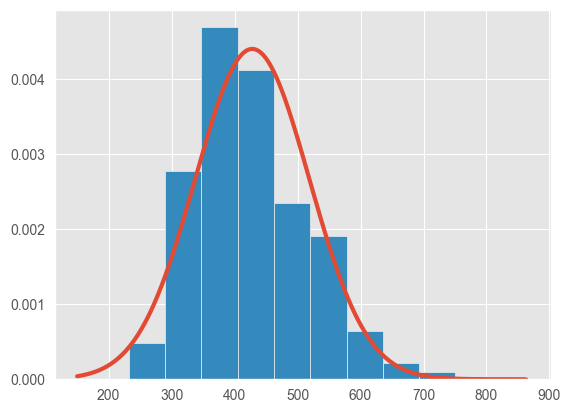

In [8]:
x = np.linspace(150, 862, 10000)
norm_rv = stats.norm(loc=m, scale=s)
pdf = norm_rv.pdf(x)

# плотность
plt.plot(x, pdf, lw=3)

plt.hist(X, bins=bins_number, density=True);
plt.show()

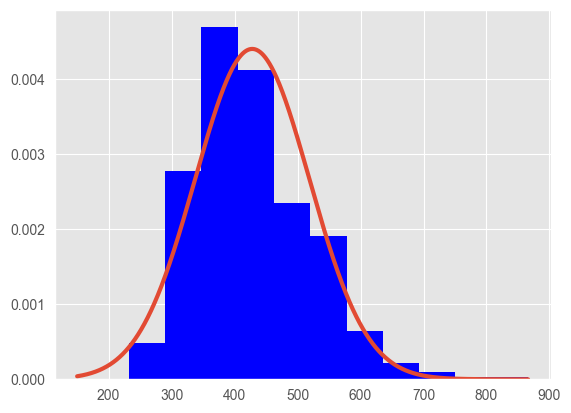

In [10]:
x = np.linspace(150, 866, 10000)
norm_rv = stats.norm(loc=m, scale=s)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf, lw=3)
Xf2, bins = np.histogram(X, bins=bins_number)
plt.stairs(Xf2 / (h * n), edges=bins, fill=True, color='blue')

In [11]:
def chisquare_normal(dist, m, d, bins, ddof=2):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - ddof - 1)

In [11]:
chisquare_normal(X, m, s, bins_number)

(373.83479871680674, 0.0)

### $Z = n\left(\frac{\gamma^2}{6}+\frac{\epsilon^2}{24}\right)$
### $\gamma=\frac{\hat{\mu}_3}{\hat{\sigma}^3}=\frac{\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^3}{\left(\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2\right)^{3 / 2}}$
### $\epsilon=\frac{\hat{\mu}_4}{\hat{\sigma}^4} - 3=\frac{\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^4}{\left(\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2\right)^2} - 3$
$\gamma - коэффициент асимметрии $
$\epsilon -коэффициент  эксцесса$
 $μ ̂_3$ третий центральный момент
 $μ ̂_4$ четвертый центральный момент
 n - число наблюдений


In [16]:
stats.jarque_bera(X)

Jarque_beraResult(statistic=162.56186413710836, pvalue=0.0)